### 주문량 상위 10개 메뉴 - 막대그래프

In [2]:
import pandas as pd
# 메뉴만 나와있는 데이터 불러오기
df = pd.read_excel('only_menu.xlsx')
df.head()

,아이스아이리쉬라떼,카페라떼,아이스연유라떼,복숭아아이스티,바닐라라떼,아이스토피넛라떼,아이스바닐라라떼,아이스카페라떼,아이스카라멜마끼아또,딸기연유라떼 14oz,...,화이트민트초코라떼,아이스 잉글리쉬 블랙퍼스트,페퍼민트,아이스 레몬글라스,생강차 ICE,딸기라떼,토피넛모카,아이스아메리카노,아메리카노,샷추가
0,1,3,1,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,3,2,2
1,0,2,0,2,0,0,1,2,1,1,...,0,0,0,0,0,0,0,1,2,2
2,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2,1
3,0,1,0,12,3,0,2,1,0,2,...,0,0,0,0,0,0,0,4,0,12
4,0,2,1,9,0,0,2,4,0,0,...,0,0,0,0,0,0,0,6,5,8


In [3]:
# 칼럼별로 합계 내기
sum = df.sum()
df_sum = pd.DataFrame(sum)
df_sum

,0
아이스아이리쉬라떼,91
카페라떼,1652
아이스연유라떼,1106
복숭아아이스티,17005
바닐라라떼,509
...,...
딸기라떼,11
토피넛모카,9
아이스아메리카노,11300
아메리카노,2441


In [4]:
# 칼럼명 변경
df_sum.rename(columns={0: 'count'}, inplace=True)
df_sum.head(1)

,count
아이스아이리쉬라떼,91


In [5]:
# 내림차순으로 정렬
df_sorted = df_sum.sort_values(by='count', ascending=False)

# 상위 10개만 출력
df_10 = df_sorted.head(10)
df_10.head(3)

,count
복숭아아이스티,17005
샷추가,13196
아이스아메리카노,11300


In [6]:
# 'menu' 칼럼 추가
df_10_with_menu = df_10.reset_index()
df_10_with_menu[['index', 'count']]
df_10_with_menu.rename(columns={'index': 'menu'}, inplace=True)
df_10_with_menu.head(3)

,menu,count
0,복숭아아이스티,17005
1,샷추가,13196
2,아이스아메리카노,11300


In [7]:
df_10_with_menu['menu'].tolist()

['복숭아아이스티',
 '샷추가',
 '아이스아메리카노',
 '아이스카페라떼',
 '아메리카노',
 '아이스바닐라라떼',
 '젤라또',
 '카페라떼',
 '석류아이스티',
 '아이스연유라떼']

In [8]:
df_10_with_menu['count'].tolist()

[17005, 13196, 11300, 2831, 2441, 2243, 1815, 1652, 1636, 1106]

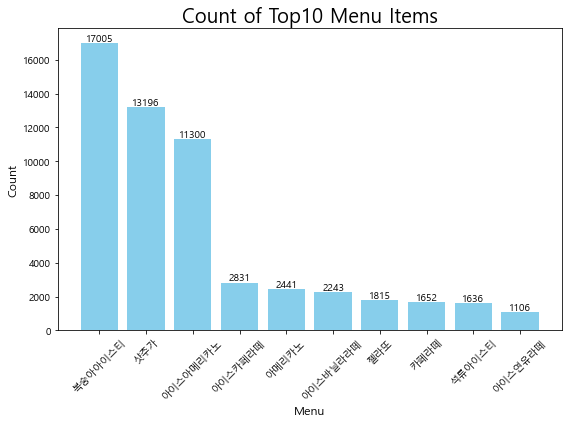

In [9]:
import matplotlib.pyplot as plt
#from matplotlib.transforms import Bbox

menu_items = ['복숭아아이스티',
 '샷추가',
 '아이스아메리카노',
 '아이스카페라떼',
 '아메리카노',
 '아이스바닐라라떼',
 '젤라또',
 '카페라떼',
 '석류아이스티',
 '아이스연유라떼']

counts = [17005, 13196, 11300, 2831, 2441, 2243, 1815, 1652, 1636, 1106]

# 막대 그리프 그리기
plt.figure(figsize=(8, 6))   # 그래프 크기 설정

bars = plt.bar(menu_items, counts, color='skyblue')

plt.xlabel('Menu', fontsize=12)   # x축 레이블
plt.ylabel('Count', fontsize=12)   # y축 레이블
plt.title('Count of Top10 Menu Items', fontsize=20)   # 그래프 제목
plt.xticks(rotation=45, fontsize=10)   # x축 레이블 회전

plt.xticks(menu_items)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count,
             ha='center', va='bottom', fontsize=10)

plt.rcParams['font.family'] = 'Malgun Gothic'     # 한국어 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False        # 마이너스 깨짐 방지
    
plt.tight_layout()
#plt.show()

In [10]:
# plt.savefig('Top10_menu_bargraph.png', format='png', bbox_inches='tight')